# Práctica 5. Clustering

### a) Importar librerías necesarias

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
import ipympl
import warnings
plt.rcParams['figure.figsize'] = (8, 8)
plt.style.use('ggplot')

In [2]:
warnings.filterwarnings("ignore")

In [3]:
%matplotlib ipympl

In [4]:
path=('./data/1_data_limpia/Environment_LandUse_clean.csv')
data = pd.read_csv(path, encoding='latin-1')

# Clustering

## 2. K-means

In [5]:
# Selección de variables
X = np.array(data[['Agricultural land', 'Naturally regenerating forest','Forest land']])
Y = np.array(data['area_code'])

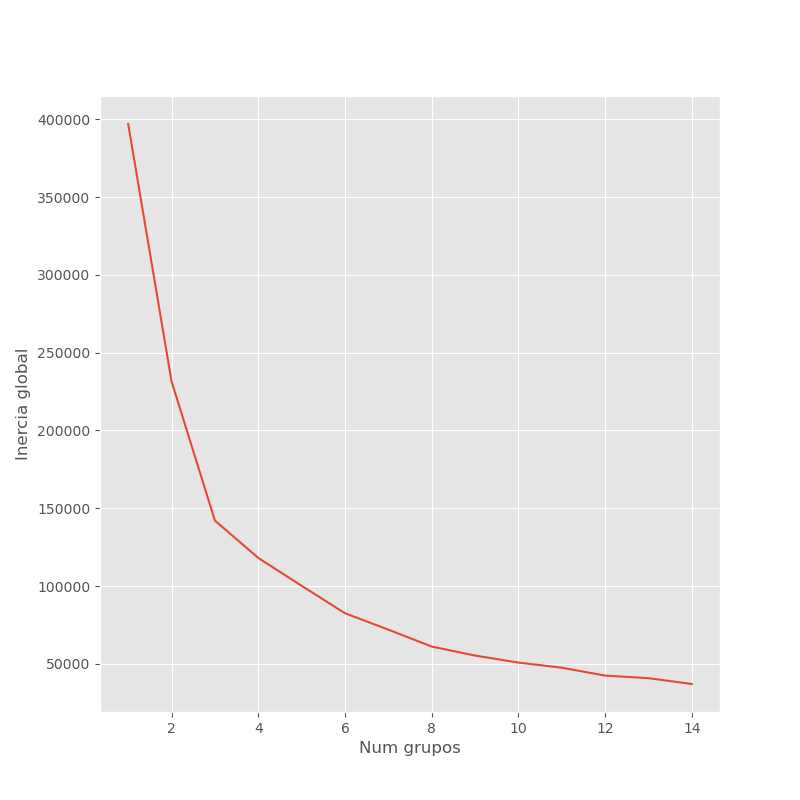

In [6]:
# Obtener el número ideal de clústers

# Método de codo
# Existen otros como:Criterio de Calinski, Affinity propagation (AP)
# Gap, dendogramas

inercias = np.zeros(15)
for k in np.arange(1,15):
    model = KMeans(n_clusters=k,init='random')
    model = model.fit(X)
    inercias[k] = model.inertia_
plt.plot(np.arange(1,15),inercias[1:])
plt.xlabel('Num grupos')
plt.ylabel('Inercia global')
plt.show()

In [6]:
# Algoritmo de cluster
kmeans = KMeans(n_clusters=3,init='k-means++').fit(X)
#init='random'
#init='ndarray'

[[21.98307692 93.33553846 58.20076923]
 [25.99482759 11.24       18.25931034]
 [49.73367347 87.88489796 19.0122449 ]]


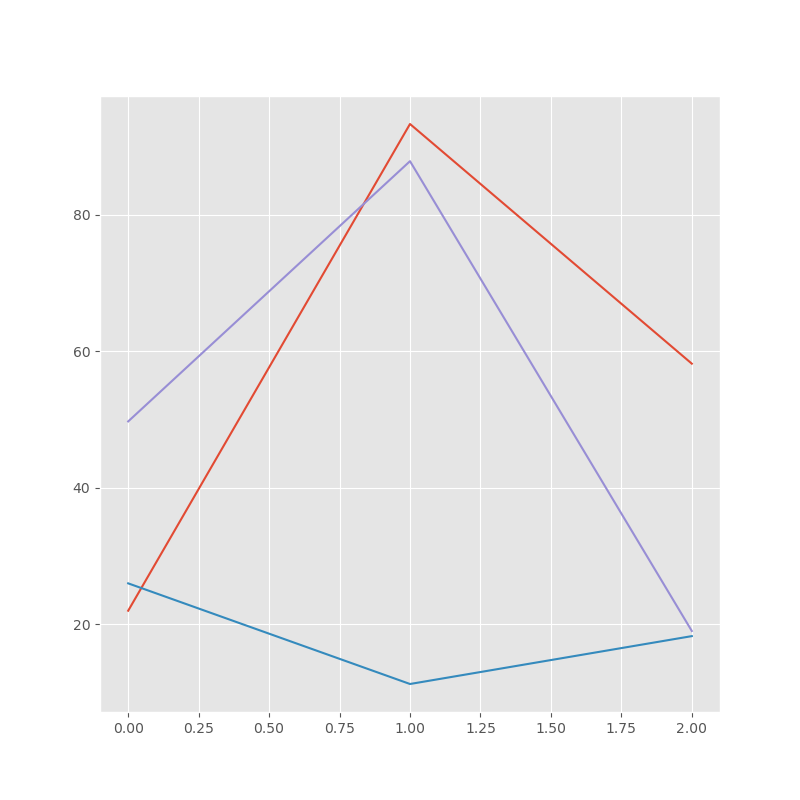

In [7]:
C = kmeans.cluster_centers_
print(C)
plt.plot(C.T)

In [8]:
#%% Gráfica con los 3 clústers
# Predecir los clústers
grupos = kmeans.predict(X)#Nos dice que observación pertenece a cada grupo

In [9]:
#%%Extraer los elementos de cada clúster
#Cluster 1
idx_0 = grupos==0
subdata_0 = X[idx_0]
pd.value_counts(data['area'][idx_0])

American Samoa    1
Latvia            1
Liechtenstein     1
Malaysia          1
Martinique        1
                 ..
Honduras          1
Croatia           1
Indonesia         1
Jamaica           1
Montenegro        1
Name: area, Length: 65, dtype: int64

In [10]:
#Cluster 2
idx_1 = grupos==1
subdata_1 = X[idx_1]
pd.value_counts(data['area'][idx_1])

Antigua and Barbuda      1
Nauru                    1
Anguilla                 1
Belgium                  1
Uzbekistan               1
Tokelau                  1
Saint Kitts and Nevis    1
Palau                    1
Qatar                    1
Portugal                 1
Poland                   1
Pitcairn                 1
Czechia                  1
Vanuatu                  1
Libya                    1
Bahrain                  1
Kuwait                   1
Jordan                   1
Israel                   1
Ireland                  1
Iceland                  1
Greenland                1
Kiribati                 1
Gibraltar                1
Egypt                    1
Denmark                  1
Cabo Verde               1
Bermuda                  1
Isle of Man              1
Name: area, dtype: int64

In [11]:
#Cluster 3
idx_2 = grupos==2
subdata_2 = X[idx_2]
pd.value_counts(data['area'][idx_2])

Armenia         1
South Africa    1
Slovakia        1
Sierra Leone    1
Senegal         1
               ..
Haiti           1
Guinea          1
Guatemala       1
Greece          1
China           1
Name: area, Length: 98, dtype: int64

In [12]:
#Observaciones que están más cerca del centroide.
#Rasgos de personalidad característicos que representan al cluster
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest  #Posición en el array de usuarios

array([ 45,   7, 167], dtype=int64)

In [13]:
#Nombres de los usuarios más cercanos al centroide.
area = data['area'].values 
for row in closest:
    print(area[row])

Estonia
Antigua and Barbuda
Tonga


In [14]:
#Clasificar nuevas muestras 
X_new = np.array([[20,40,10]]) #valor de prueba
new_labels = kmeans.predict(X_new)
print(new_labels)

[1]
